In [6]:
cd /content/drive/MyDrive/ＦX予測

/content/drive/MyDrive/ＦX予測


In [7]:
file_ = "/content/drive/MyDrive/ＦX予測/"

In [8]:
!pip install -q pytorch_lightning

In [9]:
import Method.MakeData as MakeData

In [10]:
margin=2
look_bar_length = 100
get_length = 20
cut_length = 8
visible_length = 12*3
sudden = 10

In [11]:
data,ans = MakeData.make_data(0, 0.7, look_bar_length, get_length, cut_length, visible_length, sudden)

In [12]:
#data,ans = MakeData.make_data_v2(0, 0.7, look_bar_length, get_length, cut_length, [1.5,1,0.9,0.8], [2.,4.,6.,7.], visible_length, sudden)

In [13]:
import Model.BaseModel as Model

In [14]:
import torch
import torch.nn as nn
model = nn.Sequential(
        nn.Dropout(0.7),
        nn.BatchNorm1d(data.shape[1]),
        nn.Linear(data.shape[1],1000),
        nn.Dropout(0.7),
        nn.ReLU(),
        nn.Linear(1000,500),
        nn.Dropout(0.7),
        nn.ReLU(),
        nn.Linear(500,250),
        nn.BatchNorm1d(250),
        nn.Dropout(0.7),
        nn.ReLU(),
        nn.Linear(250,100),
        nn.Dropout(0.7),
        nn.ReLU(),
        nn.Linear(100,ans.shape[1])
        )
a = Model.BaseModel(data,ans,model,f"Model1_In_Dropout2_g{get_length}_c{cut_length}_vl{visible_length}")

Global seed set to 0
Global seed set to 0


not load


In [ ]:
a.load_model("/content/drive/MyDrive/ＦX予測/Model/Model1_g10_c4_vl36_d100.pth")

In [15]:
del(data)
del(ans)

In [16]:
trainer = a.train_model(30)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type       | Params
-------------------------------------
0 | model | Sequential | 1.1 M 
-------------------------------------
1.1 M     Trainable params
0         Non-trainable params
1.1 M     Total params
4.215     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [17]:
a.draw_score(get_length-margin, cut_length+margin)

score: 764840
active_acc: 51935
active_loss: 16999
passive_acc: 130862
passive_loss: 40714


In [18]:
a.sudden_score("up")

true_accuracy: 0.19238115832342234
false_accuracy: 0.9968180557709753
y_true_accuracy 0.887448046550291


In [19]:
a.sudden_score("down")

true_accuracy: 0.1948152804999815
false_accuracy: 0.9975359419868927
y_true_accuracy 0.9092164307904729


In [20]:
log=1

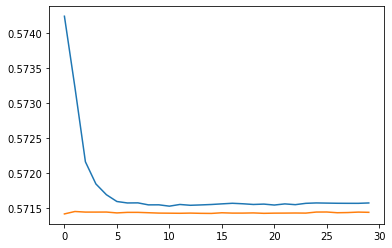

In [21]:
a.graph(log,0)

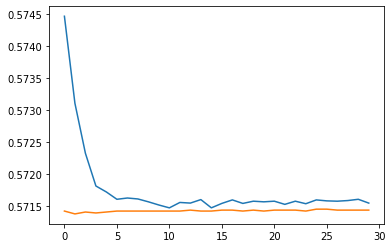

In [22]:
a.graph(log,1)

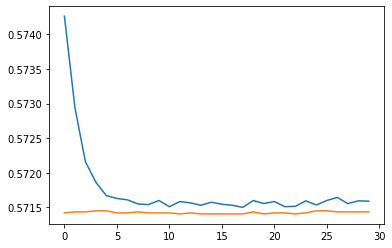

In [23]:
a.graph(log,2)

In [24]:
#torch.save(a.state_dict(), "model.pt")
a.save_model()
# device = torch.device("cpu")
# a.eval()
# traced_net = torch.jit.trace(a, torch.rand(1,a.input).to(device))
# traced_net.save(Model.save_dir + "C++" + a.root)

/usr/local/lib/python3.7/dist-packages/torch/_jit_internal.py:668: LightningDeprecationWarning: The `LightningModule.model_size` property was deprecated in v1.5 and will be removed in v1.7. Please use the `pytorch_lightning.utilities.memory.get_model_size_mb`.
  if hasattr(mod, name):
/usr/local/lib/python3.7/dist-packages/torch/_jit_internal.py:669: LightningDeprecationWarning: The `LightningModule.model_size` property was deprecated in v1.5 and will be removed in v1.7. Please use the `pytorch_lightning.utilities.memory.get_model_size_mb`.
  item = getattr(mod, name)
/usr/local/lib/python3.7/dist-packages/torch/_jit_internal.py:668: LightningDeprecationWarning: `LightningModule.use_amp` was deprecated in v1.6 and will be removed in v1.8. Please use `Trainer.amp_backend`.
  if hasattr(mod, name):
/usr/local/lib/python3.7/dist-packages/torch/_jit_internal.py:669: LightningDeprecationWarning: `LightningModule.use_amp` was deprecated in v1.6 and will be removed in v1.8. Please use `Traine

In [25]:
dd,aa=MakeData.make_data(0.8, 1, look_bar_length, get_length, cut_length, visible_length, sudden)
a.draw_score2(dd,aa, get_length-margin, cut_length+margin)
a.sudden_score2(dd,aa,"up")
a.sudden_score2(dd,aa,"down")
del(dd)
del(aa)

Global seed set to 0
Global seed set to 0


score: 709360
active_acc: 42910
active_loss: 6302
passive_acc: 250133
passive_loss: 44143
true_accuracy: 0.16052307400739127
false_accuracy: 0.9992701278027243
y_true_accuracy 0.8745482705214249


Global seed set to 0


true_accuracy: 0.15305575411007863
false_accuracy: 0.9994191925271445
y_true_accuracy 0.8987408184679958


In [ ]:
dd,aa=MakeData.make_data(0.8, 1, look_bar_length, get_length, cut_length, visible_length, sudden)
a.draw_score2(dd,aa, get_length-margin, cut_length+margin)
del(dd)
del(aa)

Global seed set to 0


score: 1257752
active_acc: 73594
active_loss: 6694
passive_acc: 249596
passive_loss: 13604


In [ ]:
del(a)

In [ ]:
144680/((2022-1999)*0.2)/365

86.17033948779034

In [ ]:
dd = torch.tensor(data, dtype=torch.float32)
aa = torch.tensor(ans, dtype=torch.float32)

In [ ]:
a.eval()
i = 0
print(a(dd[i].unsqueeze(0))[0][4:])
s = nn.Softmax(dim=0)
print(s(a(dd[i].unsqueeze(0))[0][4:]))
print(torch.argmax(torch.sigmoid(a(dd[i].unsqueeze(0))[0][4:])))
print(aa[i][4:])
print(torch.argmax(aa[i][4:]))

tensor([ 0.1064,  0.0028, -0.4696], grad_fn=<SliceBackward0>)
tensor([0.4059, 0.3659, 0.2282], grad_fn=<SoftmaxBackward0>)
tensor(0)
tensor([0., 0., 1.])
tensor(2)


In [ ]:
import numpy as np
a(torch.tensor(np.zeros([1,400],dtype=np.float32)+3,dtype=torch.float32))

tensor([[  28.4914,  -71.4073,   17.9074, -100.5290, -112.8786,  -87.7773,
           -6.7142]], grad_fn=<AddmmBackward0>)